In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker, rc
import numpy as np
plt.style.use('default')
rc('font',**{'family':'serif'})
rc('text', usetex=True)

import seaborn as sns
import os

%matplotlib inline
def set_rc_params():
    '''
    Set figure parameters
    This should be a config one day
    '''
    plt.rcParams.update({'figure.facecolor':'w'})
    plt.rcParams.update({'axes.linewidth': 1.3})
    plt.rcParams.update({'xtick.labelsize': 16})
    plt.rcParams.update({'ytick.labelsize': 16})
    plt.rcParams.update({'xtick.major.size': 8})
    plt.rcParams.update({'xtick.major.width': 1.3})
    plt.rcParams.update({'xtick.minor.visible': True})
    plt.rcParams.update({'xtick.minor.width': 1.})
    plt.rcParams.update({'xtick.minor.size': 6})
    plt.rcParams.update({'xtick.direction': 'out'})
    plt.rcParams.update({'ytick.major.width': 1.3})
    plt.rcParams.update({'ytick.major.size': 8})
    plt.rcParams.update({'ytick.minor.visible': True})
    plt.rcParams.update({'ytick.minor.width': 1.})
    plt.rcParams.update({'ytick.minor.size':6})
    plt.rcParams.update({'ytick.direction':'out'})
    plt.rcParams.update({'font.family': 'serif'})
    


    return

set_rc_params()

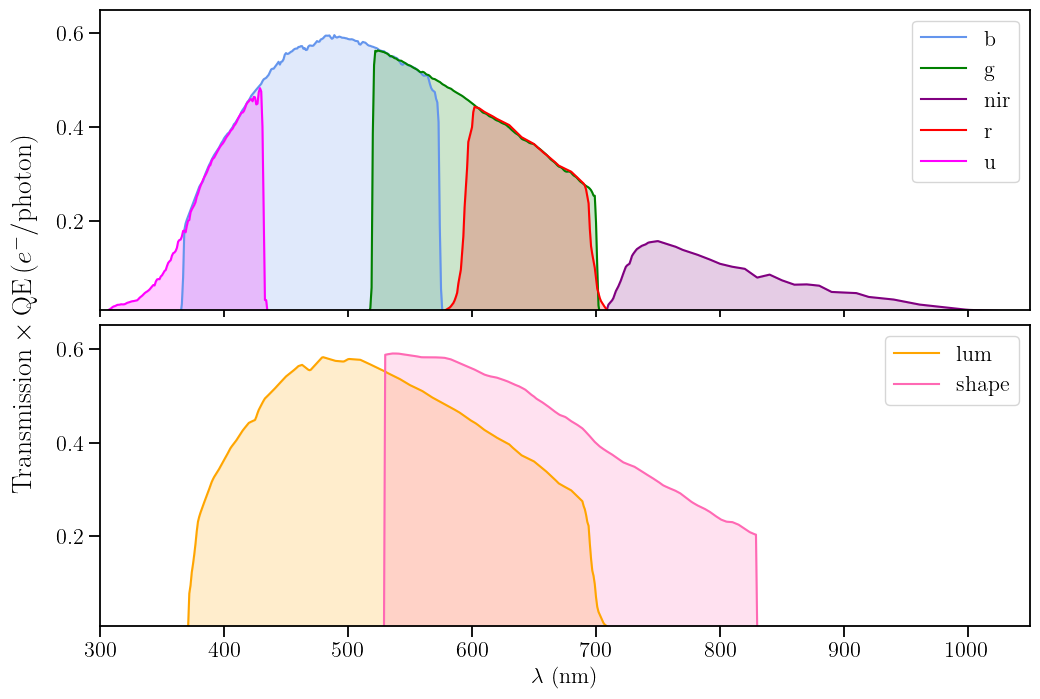

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Define the directory and file names
# These paths are from the superbit_photometry repository /updated directories from Ajay
directory = "/home/wslgeorgios/superbit_photometry/data/instrument/updated"
files1 = ["b_2023.csv", "g_2023.csv", "nir_2023.csv", "r_2023.csv", "u_2023.csv"]
files2 = ["lum_2023.csv", "shape_2023.csv"]

# Define the colors for each filter
colors = {"b_2023.csv": "cornflowerblue",
          "g_2023.csv": "green",
          "nir_2023.csv": "purple",
          "r_2023.csv": "red",
          "u_2023.csv": "fuchsia",
          "lum_2023.csv": "orange",
          "shape_2023.csv": "hotpink"}

# Create the plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True, gridspec_kw={'hspace': 0.05})

# First plot with original five files (u, b, g, r, nir)
for file in files1:
    file_path = os.path.join(directory, file)
    df = pd.read_csv(file_path)
    ax1.plot(df["wavelengths"], df["transmission"], lw=1.5, color=colors[file], label=file[:-9])
    ax1.fill_between(df["wavelengths"], df["transmission"], color=colors[file], alpha=0.2)

# Second plot with the new two files (lum, shape)
for file in files2:
    file_path = os.path.join(directory, file)
    df = pd.read_csv(file_path)
    ax2.plot(df["wavelengths"], df["transmission"], lw=1.5, color=colors[file], label=file[:-9])
    ax2.fill_between(df["wavelengths"], df["transmission"], color=colors[file], alpha=0.2)

# Set axes labels
ax2.set_xlabel(r'$\lambda$ (nm)', fontsize=16)

# Add shared y-axis label
fig.text(0.05, 0.5, r'$\mathrm{Transmission} \times \mathrm{QE} \, ({e^-}/\mathrm{photon})$', va='center', rotation='vertical', fontsize=20)

# Set y-axis ticks with a step of 0.2
ax1.set_yticks(np.arange(0, 0.7, 0.2), minor=True)
ax2.set_yticks(np.arange(0, 0.7, 0.2), minor=True)
#ax1.tick_params(which='major')
ax1.minorticks_off()
ax1.tick_params(axis='x', length=5)

# Add legends, make them larger
ax1.legend(fontsize=14, bbox_to_anchor=(1.0, 1.0), prop={'size': 16})
ax2.legend(fontsize=14, bbox_to_anchor=(1.0, 1.0), prop={'size': 16})

# Set axes limits
ax1.set_ylim(0.01, 0.65)
ax1.set_xlim(300, 1050)
ax2.set_ylim(0.01, 0.65)

# Save plot to PDF
#fig.savefig('/home/wslgeorgios/superbit_photometry/transmission.pdf')

# Save plot to png
#fig.savefig('/home/wslgeorgios/superbit_photometry/phot_filt_UPDATED.png')

plt.show()